1、$\hat{y} = \omega * x$的梯度下降算法

In [17]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0,4.0,6.0]

w = 1.0

def forward(x):
    return w * x

def cost(xs,ys):
    cost = 0
    for x,y in zip(xs,ys):
        y_pred = forward(x)
        cost += (y_pred - y)**2
    return cost / len(xs)

def gradient(xs, ys):
    grad = 0
    for x,y in zip(xs,ys):
        grad += 2*x*(w*x-y)
    return grad / len(xs)

print('Predict (before training)',4,forward(4))

for epoch in range(100):
    cost_val = cost(x_data,y_data)
    grad_val = gradient(x_data,y_data)
    w -= 0.01*grad_val

    if epoch % 10 == 0:
        print('epoch:', epoch, 'w: %.4f' % w, 'loss: %.4f' % cost_val)

print('Predict (after training)',4,forward(4))

Predict (before training) 4 4.0
epoch: 0 w: 1.0933 loss: 4.6667
epoch: 10 w: 1.6597 loss: 0.6576
epoch: 20 w: 1.8722 loss: 0.0927
epoch: 30 w: 1.9520 loss: 0.0131
epoch: 40 w: 1.9820 loss: 0.0018
epoch: 50 w: 1.9932 loss: 0.0003
epoch: 60 w: 1.9975 loss: 0.0000
epoch: 70 w: 1.9990 loss: 0.0000
epoch: 80 w: 1.9996 loss: 0.0000
epoch: 90 w: 1.9999 loss: 0.0000
Predict (after training) 4 7.999777758621207


## 汽车优化设计之梯度下降--二元函数

[1 1] 作为初始值开始的迭代......


  0%|          | 4892/100000000 [00:00<13:34, 122773.58it/s]

极小值 x，y = [0.00035336 0.00035336] 


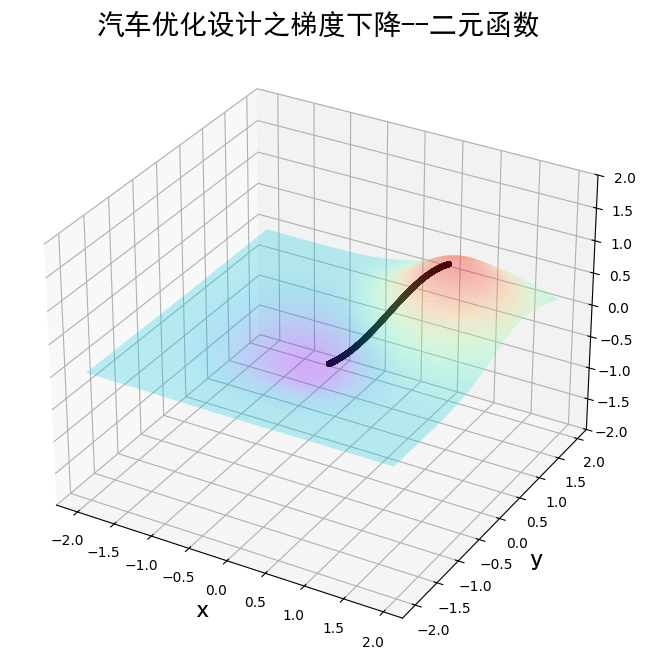

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from tqdm import tqdm


'''二维梯度下降法'''
def func_2d_single(x,y):
    '''
    目标函数传入x,y
    :param x,y: 自变量，一维向量
    :return: 因变量，标量
    '''
    z1 = np.exp(-x**2-y**2)
    z2 = np.exp(-(x-1)**2-(y-1)**2)
    z = -(z1-2*z2)*0.5
    return z

def func_2d(xy):
    '''
    目标函数传入xy组成的数组，如[x1,y1]
    :param xy: 自变量，二维向量  （x，y）
    :return: 因变量，标量
    '''
    z1 = np.exp(-xy[0]**2-xy[1]**2)
    z2 = np.exp(-(xy[0]-1)**2-(xy[1]-1)**2)
    z = -(z1-2*z2)*0.5
    return z
def grad_2d(xy):
    '''
    目标函数的梯度
    :param xy: 自变量，二维向量
    :return: 因变量，二维向量  (分别求偏导数，组成数组返回)
    '''
    grad_x = 2*xy[0]*(np.exp(-(xy[0]**2+xy[1]**2)))
    grad_y = 2*xy[1]*(np.exp(-(xy[0]**2+xy[1]**2)))
    return np.array([grad_x,grad_y])


def gradient_descent_2d(grad, cur_xy=np.array([1, 1]), learning_rate=0.001, precision=0.001, max_iters=100000000):
    '''
    二维目标函数的梯度下降法
    :param grad: 目标函数的梯度
    :param cur_xy: 当前的x和y值
    :param learning_rate: 学习率
    :param precision: 收敛精度
    :param max_iters: 最大迭代次数
    :return: 返回极小值
    '''
    print(f"{cur_xy} 作为初始值开始的迭代......")
    x_cur_list = []
    y_cur_list = []
    for i in tqdm(range(max_iters)):
        grad_cur = grad(cur_xy)
        ##创建两个列表，用于接收变化的x，y
        if np.linalg.norm(grad_cur,ord=2)<precision:  ##求范数，ord=2 平方和开根
            break    ###当梯度接近于0时，视为收敛
        cur_xy = cur_xy-grad_cur*learning_rate
        x_cur_list.append(cur_xy[0])
        y_cur_list.append(cur_xy[1])
        # print('第%s次迭代：x，y = %s'%(i,cur_xy))
    print('极小值 x，y = %s '%cur_xy)
    return (x_cur_list,y_cur_list)

if __name__=="__main__":
    current_xy_list = gradient_descent_2d(grad_2d)
    fig = plt.figure(figsize=(12,8))
    ax = plt.axes(projection='3d')
    a = np.array(current_xy_list[0])
    b = np.array(current_xy_list[1])
    c = func_2d_single(a,b)
    ax.scatter(a,b,c,c='Black',s=10,alpha=1,marker='o')
    x = np.arange(-2,2,0.05)
    y = np.arange(-2,2,0.05)
    ##对x,y数据执行网格化
    x,y = np.meshgrid(x,y)
    z = func_2d_single(x,y)
    ax.plot_surface(x,y,z,
                    rstride=1,##retride(row)指定行的跨度
                    cstride=1,##retride(column)指定列的跨度
                    cmap='rainbow',
                    alpha=0.3
                    )  ##设置颜色映射
    # ax.plot_wireframe(x,y,z,)
    ##设置z轴范围
    ax.set_zlim(-2,2)
    ##设置标题
    plt.title('汽车优化设计之梯度下降--二元函数',fontproperties = 'SimHei',fontsize = 20)
    plt.xlabel('x',fontproperties = 'SimHei',fontsize = 20)
    plt.ylabel('y', fontproperties='SimHei', fontsize=20)
    plt.show()

## 随机梯度下降实现

In [21]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0
def forward(x):
    return w * x

def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y)**2

def gradient(x,y):
    return 2 * x * (w*x - y)

print('Predict (before training)',4,forward(4))

for epoch in range(100):
    for x,y in zip(x_data,y_data):
        grad = gradient(x,y)
        w -= 0.01 * grad
        print('\tgrad:',x,y,grad)
        l = loss(x,y)
    print('progress:',epoch,'w=%.2f' % w,'loss= %.2f' % l)

print('Predict (after training)',4,forward(4))

Predict (before training) 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.84
	grad: 3.0 6.0 -16.2288
progress: 0 w=1.26 loss= 4.92
	grad: 1.0 2.0 -1.478624
	grad: 2.0 4.0 -5.796206079999999
	grad: 3.0 6.0 -11.998146585599997
progress: 1 w=1.45 loss= 2.69
	grad: 1.0 2.0 -1.093164466688
	grad: 2.0 4.0 -4.285204709416961
	grad: 3.0 6.0 -8.87037374849311
progress: 2 w=1.60 loss= 1.47
	grad: 1.0 2.0 -0.8081896081960389
	grad: 2.0 4.0 -3.1681032641284723
	grad: 3.0 6.0 -6.557973756745939
progress: 3 w=1.70 loss= 0.80
	grad: 1.0 2.0 -0.59750427561463
	grad: 2.0 4.0 -2.3422167604093502
	grad: 3.0 6.0 -4.848388694047353
progress: 4 w=1.78 loss= 0.44
	grad: 1.0 2.0 -0.44174208101320334
	grad: 2.0 4.0 -1.7316289575717576
	grad: 3.0 6.0 -3.584471942173538
progress: 5 w=1.84 loss= 0.24
	grad: 1.0 2.0 -0.3265852213980338
	grad: 2.0 4.0 -1.2802140678802925
	grad: 3.0 6.0 -2.650043120512205
progress: 6 w=1.88 loss= 0.13
	grad: 1.0 2.0 -0.241448373202223
	grad: 2.0 4.0 -0.946477622952715
	grad: 3.0 6.0 -1.